# Финальный проект - Исправление моего финансового провала
##### Автор: Басырова Елизавета


Возможно "финансовый провал" - это преувеличение, но всё же его я и собираюсь рассматривать. В ноябре 2021 года мне на день рождения подарили больше денег чем обычо, так как это было моё 18летие. На часть от этих денег я решила купить акцию и причём одну. Понятно, что это было не самое умное финансовое решение, но давайте посмотрим, что мне лучше было бы сделать и как я могла бы спасти положение с той акцией, которая у меня уже есть. 


In [ ]:
#импортирую библиотеки для дальнешей работы
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets 
%matplotlib inline

####1. Покупка акции META

Я купила акцию Meta, потому что читала об их успехе на курсе по англйскому и мне порекомендовало её тинькофф инвестиции. Давайте же саму акцию рассмотрим.

In [ ]:
pip install yfianance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement yfianance (from versions: none)
ERROR: No matching distribution found for yfianance


[*********************100%***********************]  1 of 1 completed


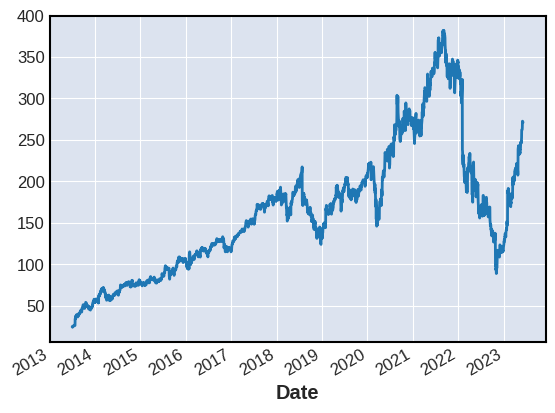

In [53]:
import yfinance as yf #решила загрузить данные с yahoo
meta = yf.download('META','2013-07-01','2023-06-07') #выбираю такой период, потому что такие данные даны мне в моём приложении
meta['Adj Close'].plot()
plt.show()

Угадайте в какой же момент купила акцию я? Да, в 2021 году в момент этого большого падения, который виден на графике. По моей логике тогда цена и так достаточно сильно упала и дальше должны бы была расти, но в ближайшее время вышел ежемесячный отчёт META, где они скзали о большом увеличении расходов и цена полетела вниз.

In [ ]:
#смотрим, как выглядят загруженные данные
meta.head() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-07-01,24.969999,25.059999,24.620001,24.809999,24.809999,20582200
2013-07-02,24.700001,24.770000,24.299999,24.410000,24.410000,18394100
2013-07-03,24.219999,24.709999,24.150000,24.520000,24.520000,10404400
2013-07-05,24.650000,24.660000,24.200001,24.370001,24.370001,20229500
2013-07-08,24.469999,25.040001,24.420000,24.709999,24.709999,27064600


Давайте построим более красивый график, отражающий цены с момента моей покупки - 19 января 2022 года.

In [ ]:
pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.8 MB/s eta 0:00:00


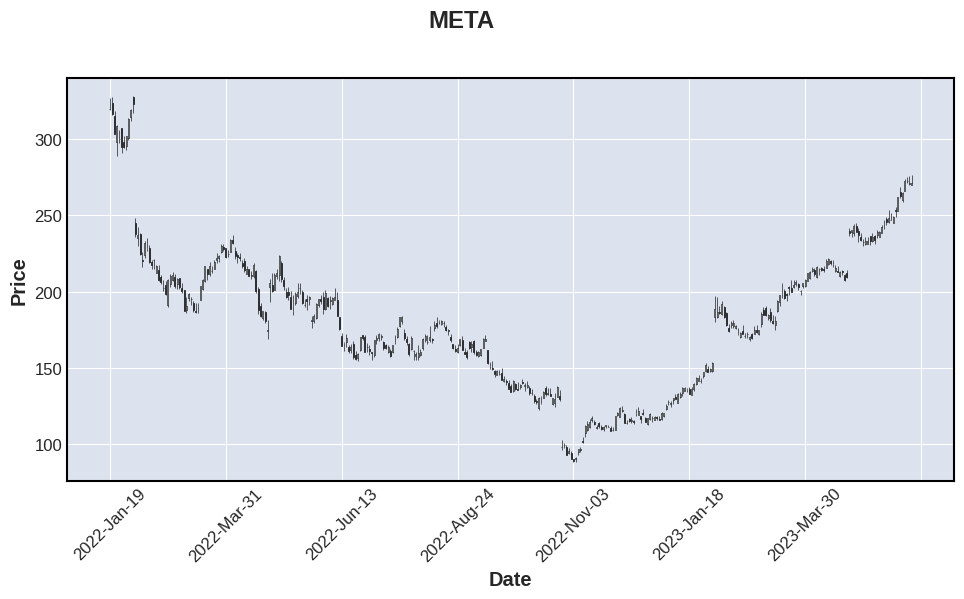

In [ ]:
import mplfinance as mpf
mpf.plot(meta['2022-01-19':'2023-06-07'], type='candle', figratio=(15, 7), title = "META" , xlabel = 'Date')

Мы видим резкие перепады и даже пустые места на графике. Это из-за того, что буквально за ночь (время закрытие рынка) появлялась новая информация. Она привела к резкой продаже с первых секунд открытия рынка.

In [ ]:
buydate = meta['2022-01-19':].head(1)
neartoday = meta.tail(1)
notprofit = float(buydate['Adj Close']) - float(neartoday['Adj Close'])
print(notprofit)

48.470001220703125


На данный момент я потеряла около 48$, что не очень много по сравнению с тем, как выглядел мой портфель до этого (прибыль была в -60% от вложения).


*   Давайте ещё рассмотрим мой убыток с учётом курса доллара.

In [ ]:
#скачиваю данные о курсе доллара с сайта ЦБ
url = 'https://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=19/01/2022&date_req2=07/06/2023&VAL_NM_RQ=R01235'
dollars = pd.read_xml(url)

In [ ]:
dollars.head(1)

,Date,Id,Nominal,Value
0,19.01.2022,R01235,1,"76,3347"


In [ ]:
dollars.tail(1)

,Date,Id,Nominal,Value
341,07.06.2023,R01235,1,"81,2502"


In [ ]:
#сейчас проще и точнее посчитать данные вручную, так как я знаю, по какой конкретно цене купила акцию
price1 = 76.3347 * 324.13 #на 19 января 2022
price2 = 81.2502 * 271.119995 #на 6 июля 2023 года
print(price1)
print(price2)
notprofitrub = price1 - price2
print(round(notprofitrub,2))

24742.366310999998
22028.553817749
2713.81


Вывод в том, что повышенный доллар сыграл мне в плюс. Так как акция куплена в валюте, это немного смягчает мои потери. В рублях это 2713,81. Но здесь не учитыается инфляция и то, что теперь на эти деньги я могу купить меньше чем могла в январе 2022 года.

### 2.   Как устроены тинькофф инвестиции 



А точнее, разберёмся, что сподвинуло меня к покупке.

Приложение "тинькофф инвестиции" также порекомендовали мне в тот момент к покупке акцию Meta platfroms (бывший Facebook,компании Цукерберга). Для меня это было в подборке "для Вас", так как она работает по нескольким простым принципам:

1. Персонализация под клиента  - учёт истории сделок (что в моём случае было не актуально).


2. Учёт покупок похожих клиентов. Здесь вот уже и начали под меня работать алгоритмы приложения - мне 18 лет, скорее всего я верю в усппешное развитие социальных сетей, у меня немного денег и я новый клиент. Всё это можно представить в форме простой матрицы:


In [ ]:
#далее объясняю модель работы алгоритма схематично:
import math
import sympy as sp

У брокера есть данные в виде Interaction Matrix - то есть у каких юзеров какие акции.  Пусть по горизонтали Item, а по вертикали User.

In [ ]:
#допустим такая матрица взаимодействий есть у брокера
InteractionMatrix = sp.Matrix([[0, 4.5, 2.0, 0], [4.0, 0, 3.5, 0], [0, 5.0, 0, 2.0], [0, 3.5, 4.0, 1.0]])
InteractionMatrix 

Matrix([
[  0, 4.5, 2.0,   0],
[4.0,   0, 3.5,   0],
[  0, 5.0,   0, 2.0],
[  0, 3.5, 4.0, 1.0]])

Задача дальше сопаставить юзеров и акции так, чтобы это было похоже на реальные данные. Брокер пытается найти зависимость, вывести алгоритм.
Нужно существующую матрицу данных Interaction matrix представить как две перемноженные матрицы User matrix и Item matrix.

In [ ]:
#допустим есть такие данные о пользователях (были бы уникальные id например)
UserMatrix = sp.Matrix([[1.2, 0.8], [1.4,0.9], [1.5, 1.0], [1.2, 0.8]])
UserMatrix

Matrix([
[1.2, 0.8],
[1.4, 0.9],
[1.5, 1.0],
[1.2, 0.8]])

In [ ]:
#допустим такие о акциях (тоже могли бы быть уникальные id для акций)
ItemMatrix = sp.Matrix([[1.5,1.2,1.0, 0.8], [1.7,0.6,1.1, 0.4]])
ItemMatrix

Matrix([
[1.5, 1.2, 1.0, 0.8],
[1.7, 0.6, 1.1, 0.4]])

Матрицу юзеров и акций мы представили как наболее подходящих под матрицу взаимодействий.

In [ ]:
UserMatrix*ItemMatrix

Matrix([
[3.16, 1.92, 2.08, 1.28],
[3.63, 2.22, 2.39, 1.48],
[3.95,  2.4,  2.6,  1.6],
[3.16, 1.92, 2.08, 1.28]])

Как мы видим она точно не идентична с нашей данной матрицей взаимодействий, но так и должно быть. В идеале она бы совпадала, но мы пытаемся подобрать и предсказать будущие действия и интересы наших юзеров. Юзеры не действует по определённо заданому алгоритму и то, что их по расчётам должно интересовать, может быть им совершенно неинтерсно. Однако так и работают рекомендации в тинькофф инвестициях.

3. A/B/C тесты - контроль, самые популярные акции по сделкам, модели. Всё это и корректирует чисто математические предположения. Так например мода на вложение в информационные платформы, социальные сети, новые технологии и прилодения - выводят Meta platforms в рновые списки рекомендаций мне. (помимо успешности компании)

4. "Выбор похожих инвесторов" - в ситуации, когда обо мне мало информации, актуально предложить мне модель каких-то других инвесторов. Долгое время эта модель в тинькофф инвестициях была из статьи "Large scale recomendation for Portfolio Optimization" от Robin M.E. Swezey и B. Charon.

В модели простая формула полезности: Матожидание от дохода по акции минус какой-то параметр умноженный на дисперсию от дохода, то есть минус риск (стпень изменчивости финаносвых переменных).

In [ ]:
R = sp.symbols('R')
E = sp.symbols('E')
Var = sp.symbols('Var')
α = sp.symbols('alpha')
utility = sp.symbols('E[R]-α*Var[R]')
utility

E[R]-α*Var[R]

Функция для агрегированной нормализованной матрицы пользовательского портфолио:

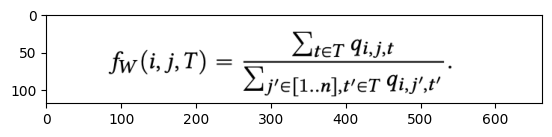

In [ ]:
img = plt.imread('Формула.png')
plt.imshow(img)
plt.show()

Посмотрим на саму статью, а точнее на введение:

In [ ]:
pip install pyPdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#скачиваю файл с интернета
import urllib.request
pdf_path = "https://arxiv.org/pdf/2103.07768v1.pdf"
def download_file(download_url, filename):
    response = urllib.request.urlopen(download_url)    
    file = open(filename + ".pdf", 'wb')
    file.write(response.read())
    file.close()
 
download_file(pdf_path, "Article")
#читаю файл и вывожу текстом здесь
import PyPDF2
pdfFileObj = open('Article.pdf', 'rb')
pdfReader = PyPDF2.PdfReader(pdfFileObj)
print(len(reader.pages))
pageObj = reader.pages[0]
print(pageObj.extract_text())
pdfFileObj.close()

5
arXiv:2103.07768v1  [cs.AI]  13 Mar 2021Large-scale RecommendationforPortfolioOptimization
Robin M.E. Swezey
RakutenInstitute of Technology
Setagaya-ku,Tokyo,Japan
rswezey@acm.orgBrunoCharron
RakutenInstitute of Technology
Setagaya-ku,Tokyo,Japan
bcharron@acm.org
ABSTRACT
Individual investors are now massively using online broker s to
trade stocks with convenient interfaces and low fees, albei t los-
ing the advice and personalization traditionally provided by full-
service brokers. We frame the problem faced by online broker s
of replicating this level of service in a low-cost and automa ted
manner for a very large number of users. Because of the care re -
quired in recommending ﬁnancial products, we focus on a risk -
management approach tailored to each user’s portfolio and r isk
proﬁle.Weshowthatourhybridapproach,basedonModernPor t-
folio Theory and CollaborativeFiltering, provides a sound and ef-
fectivesolution.Themethodisapplicabletostocksaswell asother
ﬁnancialassets,andcanbee

Так мы и примерно разобрались, как работают рекомендации в тинькофф инвестициях. Нам это интересно и полезно, потому что для улучшения своего портфеля и новых покупок полезно понимать алгоритмы платформы.

** *Информацию для этого пункта я узнала на лекциях по финтеху от ML-разработчика тинькофф Бредихина Александра.* 

### 3. Уведомление об окупаемости акции

In [69]:
import requests
from bs4 import BeautifulSoup
import smtplib

#функция для отправки письма на почту
def send_email(price):
    server = smtplib.SMTP('smtp.yandex.ru', 587)
    server.starttls()
    server.login('elizavetabasyrova@yandex.ru', 'мойпароль')
    subject = 'Цена на акцию META достигла 324 доллара!'
    body = f'Цена на акцию META достигла {price} доллара!'
    message = f'Subject: {subject}\n\n{body}'
    server.sendmail('elizavetabasyrova@yandex.ru', 'elizavetabasyrova@yandex.ru', message)
    print('Письмо отправлено!')
    server.quit()

#на сайте смотрим данные и выводим значение цены на проверку
url = 'https://finance.yahoo.com/quote/META/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser') #использую вебскрепинг
price_element = soup.find('span', {'data-reactid': '50'})
if price_element is not None:
    price_str = price_element.text.replace(',', '')
    price = float(price_str)
    if price >= 324:
        send_email(price)

Написала код для получения уведомления на мою почту, когда цена акции достигнет цены, по которй я её купила.

### 4. Изучение рынка - другие акции и возможности

Давайте рассмторим акции, похожие на META. Такими будут google, snapchat, spotify, twilio - выделены как похожие на сайте yahoo finance.

In [ ]:
import yfinance as yf 
stocks = ['META', 'GOOGL', 'SNAP', 'SPOT', 'TWLO']
data = pd.DataFrame(columns=stocks)
for stock in stocks:
    data[stock] = yf.download(stock,'2013-07-01','2023-06-07')['Adj Close']
data.head() #не все акции существовали в 2013

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,META,GOOGL,SNAP,SPOT,TWLO
Date,,,,,
2013-07-01,24.809999,22.219219,NaN,NaN,NaN
2013-07-02,24.410000,22.079830,NaN,NaN,NaN
2013-07-03,24.520000,22.182934,NaN,NaN,NaN
2013-07-05,24.370001,22.359610,NaN,NaN,NaN
2013-07-08,24.709999,22.649900,NaN,NaN,NaN


In [ ]:
data.tail()

,META,GOOGL,SNAP,SPOT,TWLO
Date,,,,,
2023-05-31,264.720001,122.870003,10.20,148.899994,69.620003
2023-06-01,272.609985,123.720001,10.33,153.919998,67.300003
2023-06-02,272.609985,124.669998,10.41,151.740005,67.150002
2023-06-05,271.390015,126.010002,10.51,156.339996,65.660004
2023-06-06,271.119995,127.309998,10.51,153.029999,68.019997


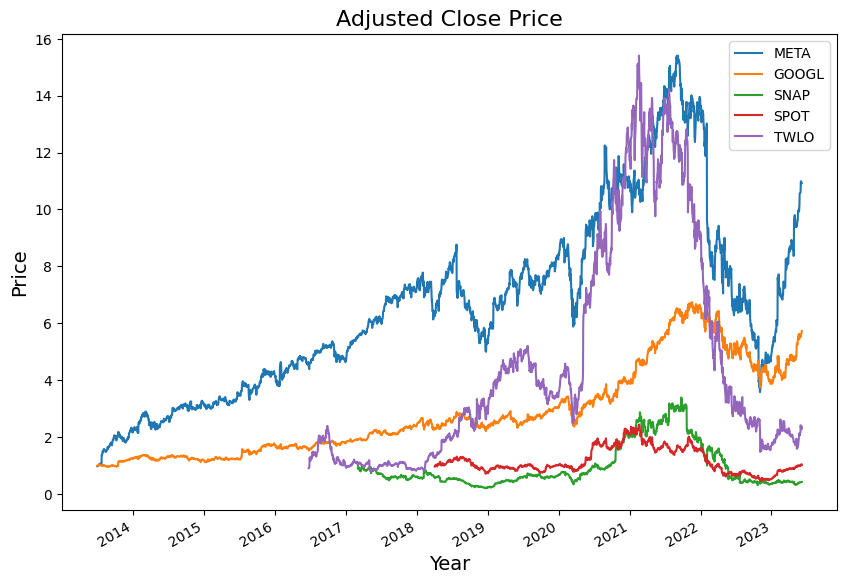

In [ ]:
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))
plt.legend()
plt.title("Adjusted Close Price", fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()

Мы смотрим на динамику цен акций. Как видно, все они упали в начале 2022 года. Давайте посмотрим, было бы оптимальнее тогда купить другую акцию:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


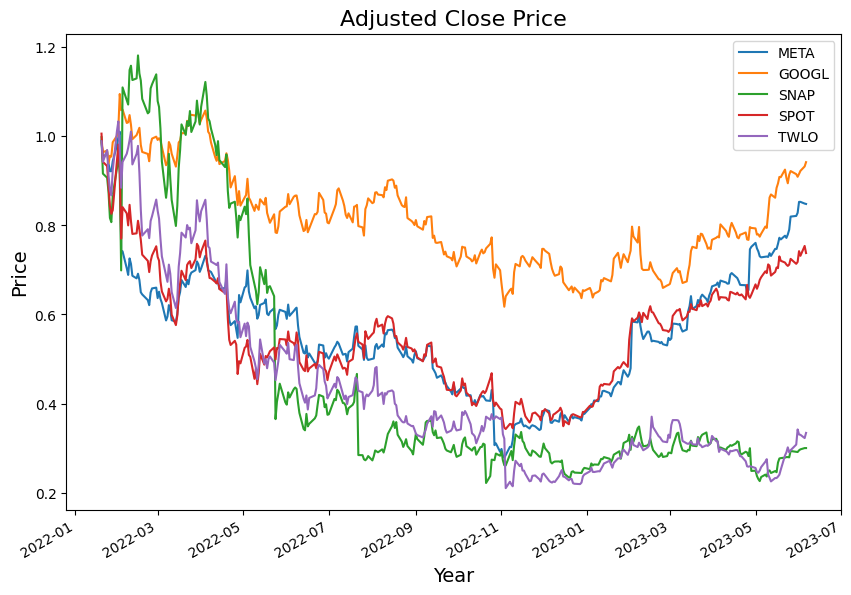

In [ ]:
for stock in stocks:
    data[stock] = yf.download(stock,'2022-01-19','2023-06-07')['Adj Close']
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))
plt.legend()
plt.title("Adjusted Close Price", fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()    

Все акции упали вниз, более стабильной кажется только google. Но их акция тоже не принесла бы прибыли на сегодня при стратегии buy and hold. Выходит не было такой акции в интересной мне сфере, которая стала бы за этот период прибольной. Оптимистичным только кажется то, что цены с весны этого года растут для meta, spotify и google. 

### 5.  Финансовые стратегии

Как мы увидели стратегия buy and hold была не оптимальной. Если бы я купила акцию позже, то заработала бы на падении.

*   Стратегия моментум



Это очень простая стратегия, которая демонстрируют восходящую или нисходящую ценовую тенденцию.

In [55]:
meta["change"] = meta["Close"].pct_change(periods=10)
#создаю dummy variable
meta["position"] = np.where(meta["change"] > 0, 1, -1) 
print(meta)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-07-01   24.969999   25.059999   24.620001   24.809999   24.809999   
2013-07-02   24.700001   24.770000   24.299999   24.410000   24.410000   
2013-07-03   24.219999   24.709999   24.150000   24.520000   24.520000   
2013-07-05   24.650000   24.660000   24.200001   24.370001   24.370001   
2013-07-08   24.469999   25.040001   24.420000   24.709999   24.709999   
...                ...         ...         ...         ...         ...   
2023-05-31  260.000000  265.000000  258.450012  264.720001  264.720001   
2023-06-01  265.899994  274.000000  265.890015  272.609985  272.609985   
2023-06-02  272.660004  275.350006  271.119995  272.609985  272.609985   
2023-06-05  270.299988  275.570007  269.559998  271.390015  271.390015   
2023-06-06  270.140015  276.570007  269.690002  271.119995  271.119995   

              Volume    change  posit

Если 1, то нужно покупать, а если -1, то продавать.



*   Стратегия, опирающаяся на границы Боллинджера




Давайте как в домашней работе осуществим технический анализ с помощью границ Боллинджера. Здесь мы их создали и отобразили:

<ipython-input-41-8ee68c739bce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta['SMA21'] = meta['Close'].rolling(21).mean()
<ipython-input-41-8ee68c739bce>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta['TP'] = (meta['High'] + meta['Low'] + meta['Close'])/3 #typicalprice
<ipython-input-41-8ee68c739bce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

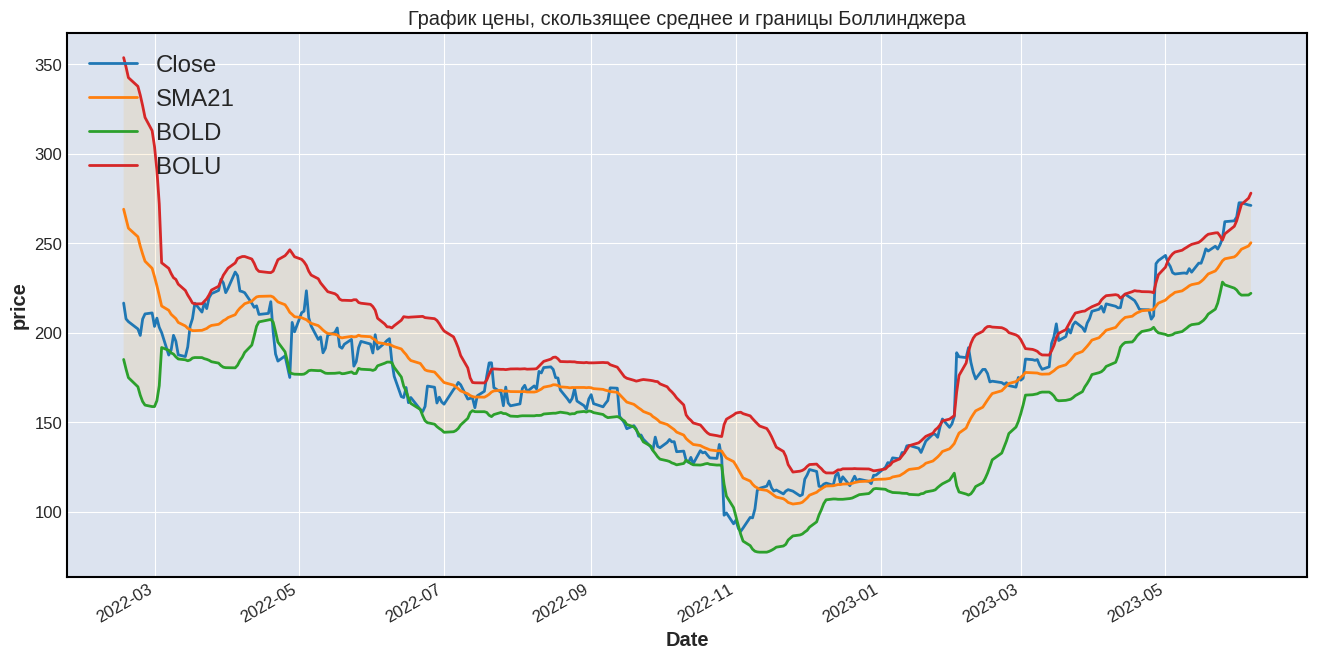

In [ ]:
from inspect import TPFLAGS_IS_ABSTRACT
#simple moving average
meta = meta['2022-01-19':'2023-06-07']
meta['SMA21'] = meta['Close'].rolling(21).mean() 
#Bollinger Bands
meta['TP'] = (meta['High'] + meta['Low'] + meta['Close'])/3 #typicalprice
meta['std'] = meta['TP'].rolling(21).std(ddof = 0 ) #standard deviation
meta['MA-TP'] = meta['TP'].rolling(21).mean()
meta['BOLU'] = meta['MA-TP'] + 2*meta['std']
meta['BOLD'] = meta['MA-TP'] - 2*meta['std']
meta.dropna(inplace = True)
#plotting
graph = meta[['Close', 'SMA21', 'BOLD', 'BOLU']].plot(label = "Prices" , figsize = (16, 8), ylabel = "price")
graph.fill_between(meta.index, meta['BOLD'], meta['BOLU'], facecolor='orange', alpha=0.1)
plt.title('График цены, скользящее среднее и границы Боллинджера')
plt.legend(loc = 2, fontsize='x-large')
plt.show() 

Создадим торговую стратегию, оснванную на границах Боллинджера:

In [ ]:
def implement_bb_strategy(data, bold, bolu):
    #создаём пустые параметры
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    #цикл для осуществления стратегии (описание ниже)
    for i in range(len(data)):
        if data[i-1] > bold[i-1] and data[i] < bolu[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < bolu[i-1] and data[i] > bolu[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(meta['Close'], meta['BOLD'], meta['BOLU'])

Описание стратегии: если цена акции предыдущего дня больше чем нижняя полоса предыдущего дня и текущая цена акций ниже нижней границы текущего дня, то подаём сигнал к покупке. Если наоборот, то к продаже.

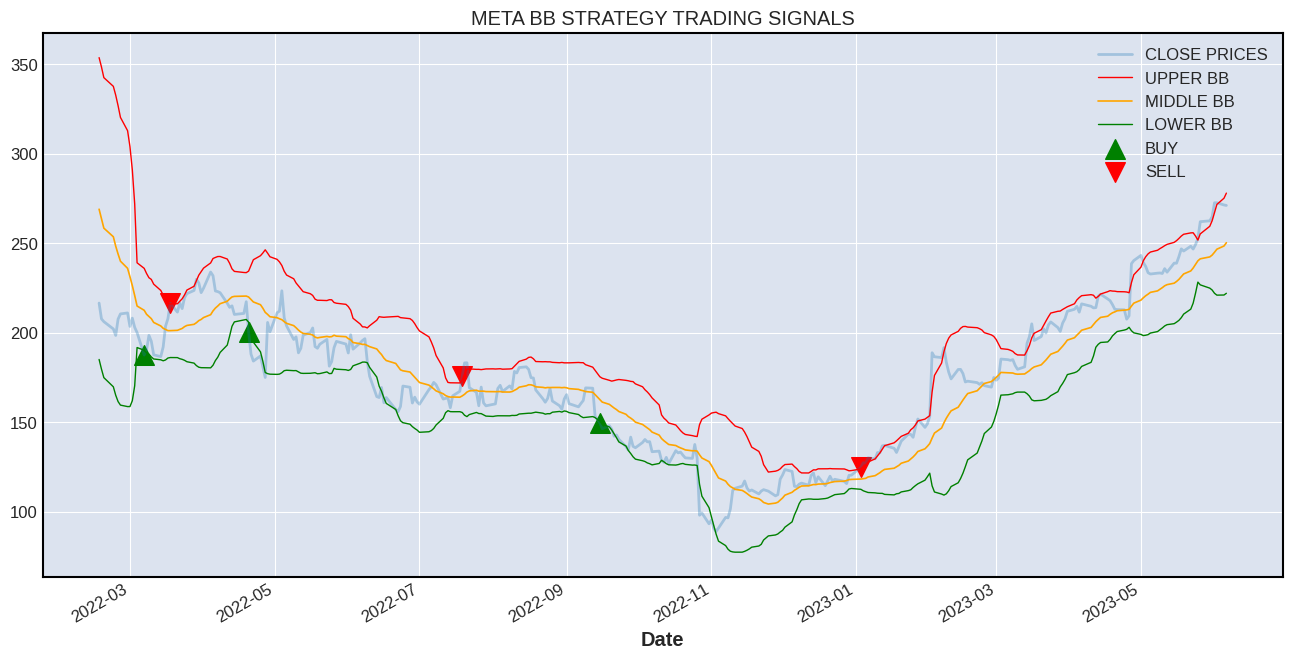

In [ ]:
meta['Close'].plot(label = 'CLOSE PRICES', figsize = (16, 8), alpha = 0.3)
meta['BOLU'].plot(label = 'UPPER BB', linewidth = 1, color = 'red')
meta['SMA21'].plot(label = 'MIDDLE BB', linewidth = 1.2, color = 'orange')
meta['BOLD'].plot(label = 'LOWER BB', linewidth = 1, color = 'green')
plt.scatter(meta.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(meta.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('META BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper right')
plt.show()

На графике мы видим моменты, когда стоило купить и продать акцию по стратегии с границами Боллинджера.

*   Стратегия золотого пересечения двух скользящих средних:





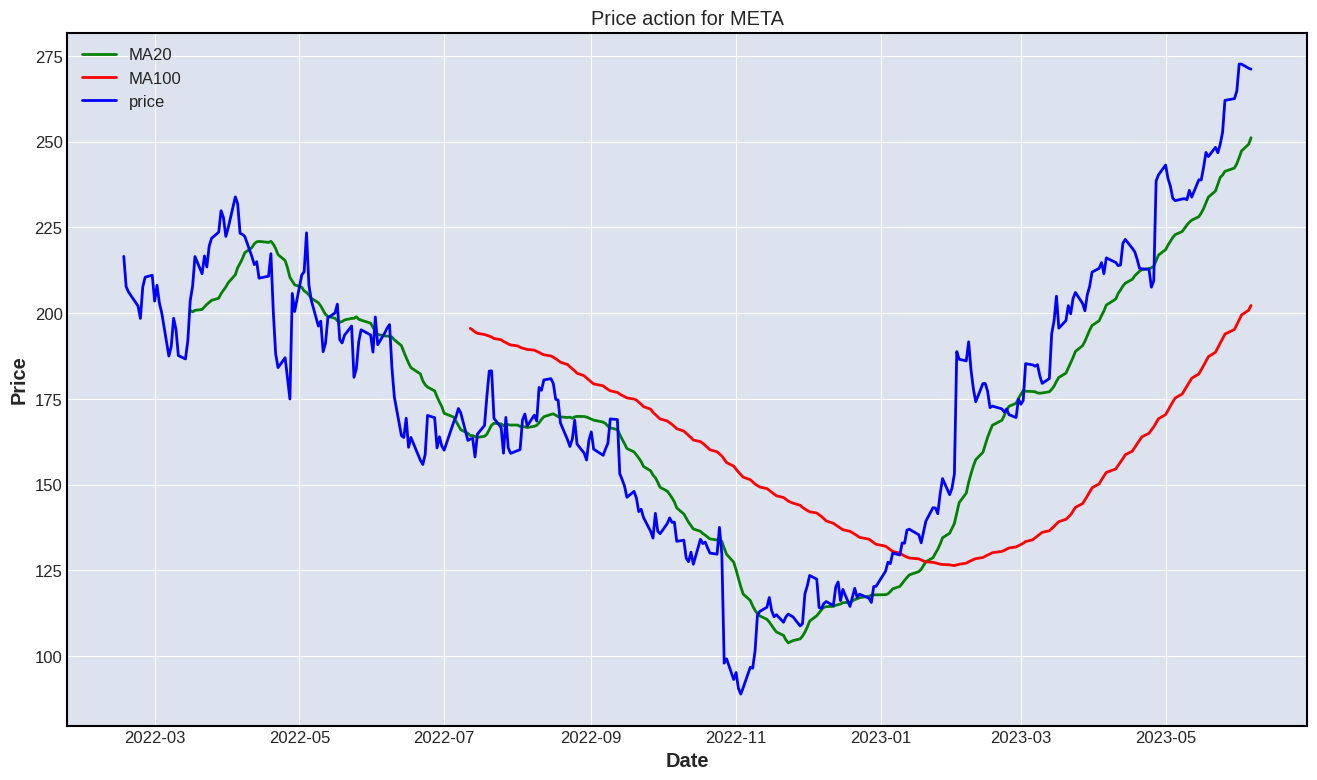

In [50]:
def plot_moving_averages(data, leading_window, lagging_window, start_date, end_date):
    new_meta = meta[start_date:end_date]
    price = new_meta['Close']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for META')
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    meta,  
    leading_window=20, 
    lagging_window=100, 
    start_date='2022-01-19',
    end_date='2023-06-07')

Стратегия заключается в том, чтобы найти пересение между двумя сколзящими средними - золотой крест. Здесь такое пересечение иденцифицирует восходящий "бычий тренд", то есть когда нужно вкладываться в лонг позицию.

Когда кривая короткосрочного скользящего среднего пересекает кривую долгосрочного среднего снизу, то это точка входа на длинную позицию. Если пересекает сверху, то нужно входить в короткую позицию. То есть закрываем сделку при повторном пересечении.

***Мой "финансовый провал", на самом деле, скорее в пересдаче по финансам в этом семестре. Надеюсь, что эти финансовые стратегии эффективны.*

### 6. Почему это всё же ошибка?



*   Нет возможности продать акции



Так уж вышло, что живу я здесь:

In [70]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 78.4 MB/s eta 0:00:00


In [75]:
import geopandas as gpd

adm_moscow = gpd.read_file("http://gis-lab.info/data/mos-adm/mo.geojson")

#нахожу границы обручевского района
obruchevsky = adm_moscow[adm_moscow['NAME'].str.contains('Обручев')]

In [85]:
import folium
#задаю координаты моего дома
my_house = [55.665477, 37.547674]
#созаю карту
map = folium.Map(location=my_house, zoom_start=11)
#создаю точку с моим домом
folium.Marker(my_house, popup='Обручевский район').add_to(map)
#дбавляю границы обручевского района на карту
folium.GeoJson(obruchevsky).add_to(map)

map

Акцию я также покупала через российского брокера.

На сегодняшний момент я не могу продать акцию, так как сейчас в тинькофф инвестициях заблокированы иностранные ценные бумаги.

*   Нельзя класть все яйца в одну корзину




Эффективнее владеть акциями в разных сферах, чтобы если что-то происходит на рынке социальных сетей, то на несвязанным с ним рынке может быть рост. 



*   Что бы я лучше тогда купила?




Это был конец ковида и до фераля 2022 года, так что я не могла тогда предсказать события.

Очевидно, что раз иностранная биржа закрыта, то нужно смотреть на российскую. Самой успешной из больших компаний на нашем рынке был Фосагро.

[*********************100%***********************]  1 of 1 completed


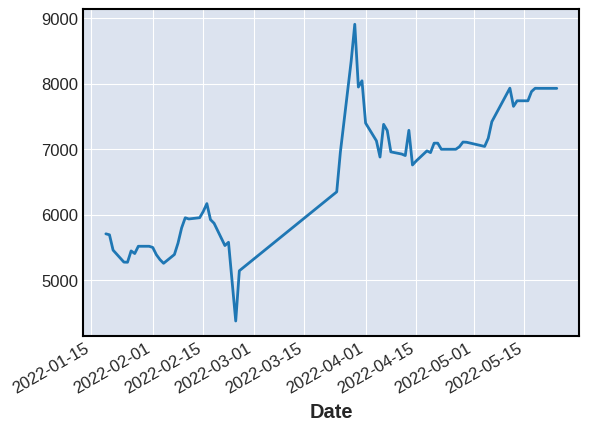

In [87]:
import yfinance as yf 
phor = yf.download('PHOR.ME','2022-01-19','2023-06-07') 
phor['Adj Close'].plot()
plt.show()

In [94]:
phor.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-19,5626.0,5820.0,5562.0,5709.0,5709.0,277292


In [95]:
phor.tail(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-24,7930.0,7930.0,7930.0,7930.0,7930.0,0


In [98]:
#посчитаю рост в процентах
(7930*100/5709) - 100

38.90348572429497

Акция выросла почти на 40% с января 2022 года к нынешнему моменту.

## Итог

Акция meta сейчас растёт вверх, компания буквально в начале июня анонсировала/выпустила новый мессенджер, новые очки виртуальной реальности и ещё многое имеют в планах. Когда я начинала этот проект - моя инвестиция была в -60%, но теперь всё выглядит не так печально. На её примере я рассмотрела то, как примерно может работать инвестиционный рынок и как лучше не делать. 